## Summary

This notebook shows how to simulate a phylogenetic tree from a Birth & Death (BD) model. The BD model is a branching process where each lineage generates on average $R_0$ new lineages during its lifetime, whose average duration we denote with $T_I$. Upon removal, a lineage is recorded in the tree with probability $\rho$. 

In [11]:
import matplotlib.pyplot as plt
from Bio import Phylo
from io import StringIO

path_pysimBD = '../lib'
if path_pysimBD not in sys.path:
    sys.path.append( path_pysimBD )

from pysimBD import *

Text(0.5, 0, 'Time')

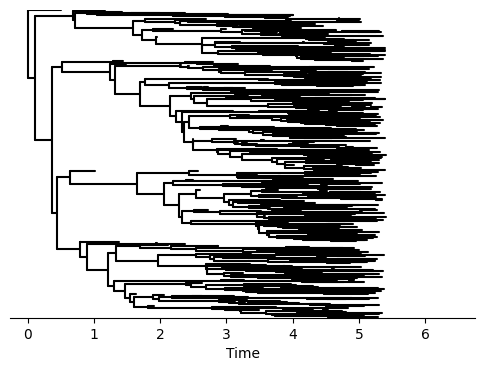

In [13]:

#== Simulations settings
SEED      = 1 
MAX_CASES = 100000 # stop early if line
N_TIPS    = 500 # desired number of tips
R0  = 2.  # basic reproduction number
TI  = 1.  # average lineage lifetime
rho = 0.5 # probability that a dying lineage is sampled and recorded in the tree

#== simulate tree from BD process

nwk = simulate_BD_tree( SEED, MAX_CASES, N_TIPS, R0, TI, rho ) # nwk is in newick/NHX format
tree = Phylo.read( StringIO( nwk ), 'newick' )

#== plotting
fig, ax = plt.subplots( figsize = ( 6, 4 ) )

tree.ladderize() # ladderize tree for ease of visualization

Phylo.draw( tree, label_func = lambda x : None, axes = ax, do_show=False )

ax.spines[['top','left','right']].set_visible( False )

ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Time')